In [29]:
# This file is used for initial analysis of the ML techniques. It will not be used directly in the final application.

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [30]:
# Importing stock data using yfinance

stockPrices = yf.download("C", start="2010-01-01")
stockPrices = stockPrices.dropna()
stockPrices = stockPrices.reset_index()
stockPrices = stockPrices.rename(columns={"Date": "date", "Open": "open", "High": "high", "Low": "low", "Close": "close", "Adj Close": "adjClose", "Volume": "volume"})

print(stockPrices.head())
 

[*********************100%%**********************]  1 of 1 completed

        date       open       high        low      close   adjClose    volume
0 2010-01-04  33.599998  34.099998  33.400002  34.000000  26.639057  40679350
1 2010-01-05  34.200001  35.500000  34.099998  35.299999  27.657602  66861710
2 2010-01-06  35.599998  36.799999  35.099998  36.400002  28.519451  67433890
3 2010-01-07  36.900002  37.000000  36.099998  36.500000  28.597807  67245190
4 2010-01-08  36.500000  36.700001  35.099998  35.900002  28.127699  62409770


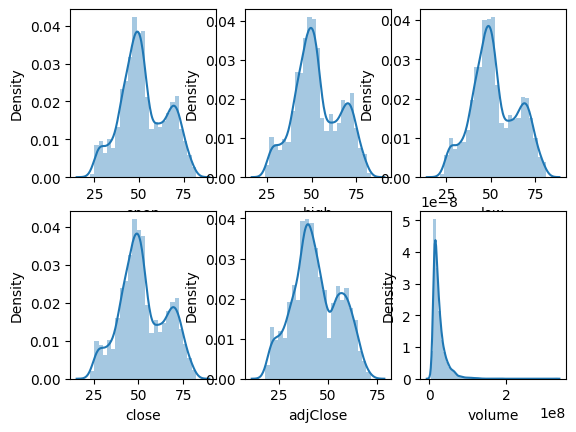

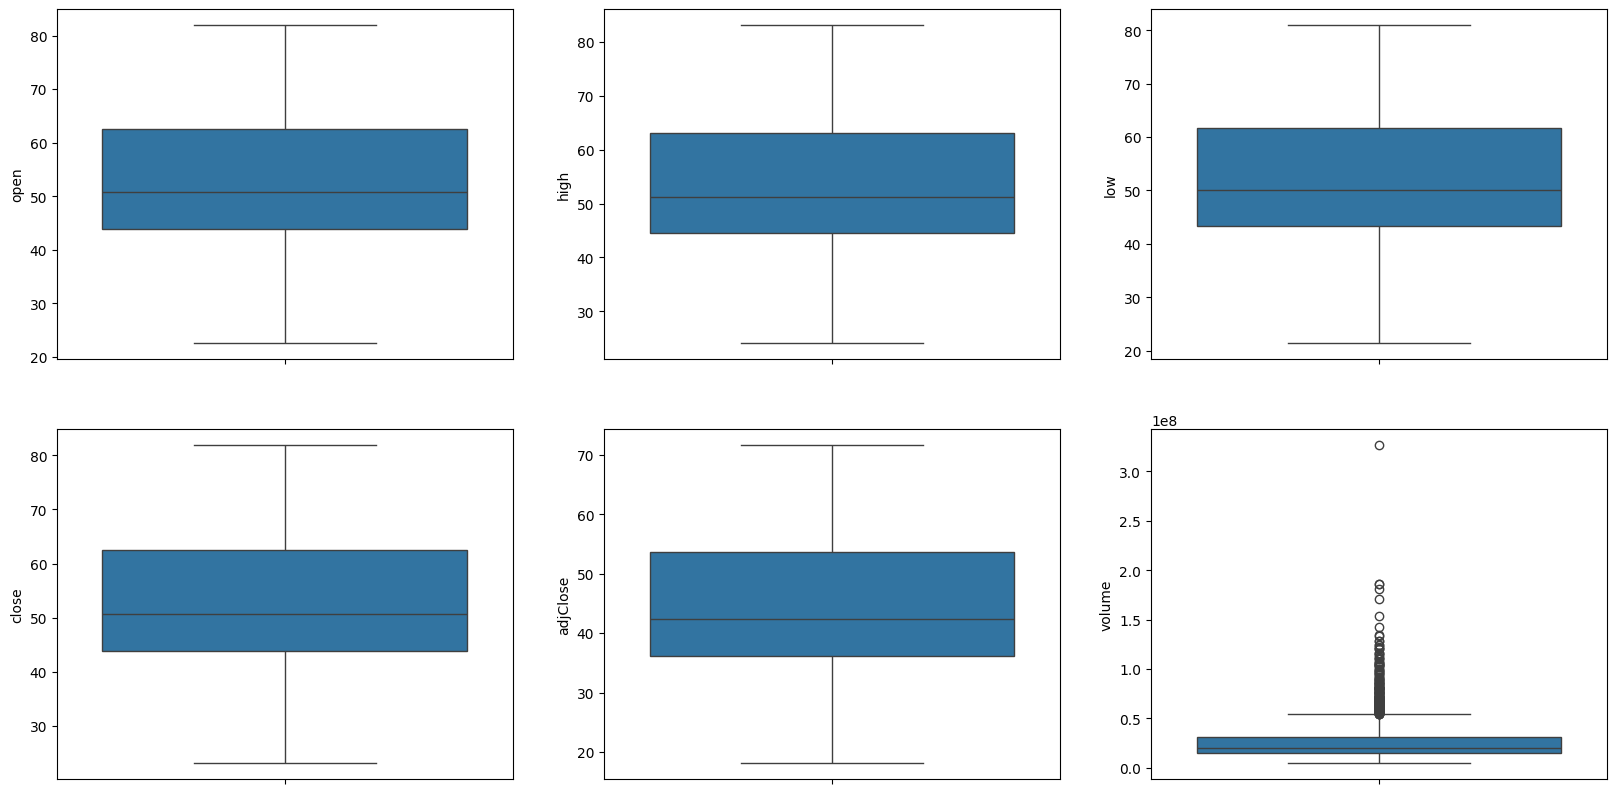

In [31]:
# Analyzing properties of data with distribution plots

features = ['open', 'high', 'low', 'close', 'adjClose', 'volume']

for i, col in enumerate(features):
    plt.subplot(2, 3, i+1)
    sb.distplot(stockPrices[col])
    
plt.show()

# Boxplots of data

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(stockPrices[col])
  
plt.show()

# Outliers appear to only exist in the volume boxplot


In [32]:
# Feature Engineering
# Deriving features from existing ones to try to improve the performance of the model

stockPrices['day'] = stockPrices['date'].dt.day
stockPrices['month'] = stockPrices['date'].dt.month
stockPrices['year'] = stockPrices['date'].dt.year
stockPrices = stockPrices.drop(columns=['date'])

# Adding a quarterly results variable (dummy variable) to capture the effects of results announcements

stockPrices['isQuarterEnd'] = np.where(stockPrices['month'] % 3 == 0, 1, 0)

print(stockPrices.head())

        open       high        low      close   adjClose    volume  day   
0  33.599998  34.099998  33.400002  34.000000  26.639057  40679350    4  \
1  34.200001  35.500000  34.099998  35.299999  27.657602  66861710    5   
2  35.599998  36.799999  35.099998  36.400002  28.519451  67433890    6   
3  36.900002  37.000000  36.099998  36.500000  28.597807  67245190    7   
4  36.500000  36.700001  35.099998  35.900002  28.127699  62409770    8   

   month  year  isQuarterEnd  
0      1  2010             0  
1      1  2010             0  
2      1  2010             0  
3      1  2010             0  
4      1  2010             0  


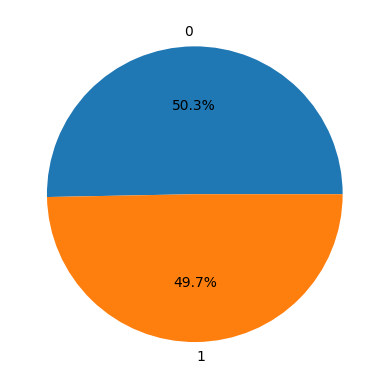

In [33]:
# Construct price change variables

stockPrices['dayChange'] = stockPrices['open'] - stockPrices['close']
stockPrices['dayRange'] = stockPrices['high'] - stockPrices['low']

# Checking if price in the day after is greater than the closing price in the day before
# Sets to 1 if true, 0 if false
stockPrices['target'] = np.where(stockPrices['close'].shift(-1) > stockPrices['close'], 1, 0)

# Checking to see if distribution of 'target' variable is balanced or not
plt.pie(stockPrices['target'].value_counts().values, labels=[0, 1], autopct='%1.1f%%')
plt.show()


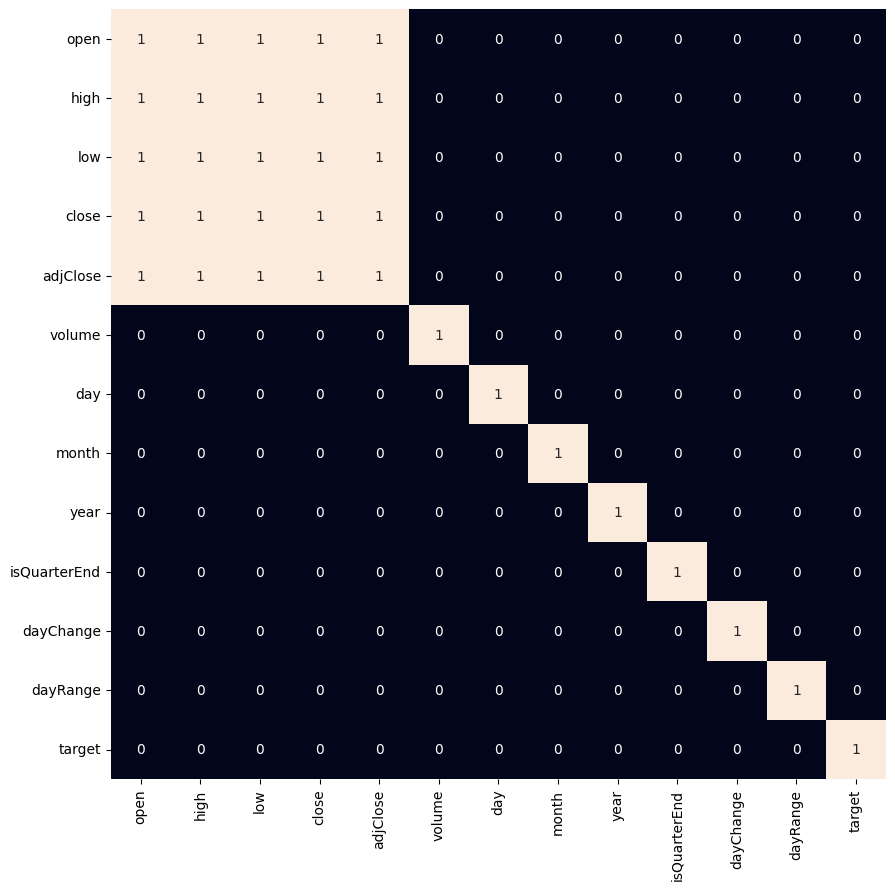

In [34]:
# Checking for correlation between added variables

plt.figure(figsize=(10, 10))
sb.heatmap(stockPrices.corr() > 0.9, annot=True, cbar=False)
plt.show()

# Verified that the added variables are not highly correlated with each other

In [ ]:
# Constructing data to train models on